# 3.6 Lab: Linear Regression

## 3.6.2 Simple Linear Regression
Examine the `Boston` data set in the `ISLR2` library

In [1]:
library(ISLR2)
head(Boston)
attach(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


We will start by using the `lm()` function to fit a simple linear regression model, with `medv` as the response and `lstat` as the predictor. The basic syntax is `lm(x ~ y, data)`, where `y` is the response, `x` is the predictor, and `data` is the data set in which these two variables are kept.

If we type `lm.fit`, some basic information about the model is output.

In [2]:
lm.fit <- lm(medv ~ lstat)
lm.fit


Call:
lm(formula = medv ~ lstat)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


For more detailed information, we use `summary(lm.fit)`. This gives us _p_-values and standard errors for the coefficients, as well as the $R^2$ statistic and _F_-statistic for the model.

In [3]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


We can use the `names()` function in order to find out what other pieces of information are stored in `lm.fit`. Although we can extract these quantities by name&mdash;e.g. `lm.fit$coefficients`&mdash;it is safer to use the extractor functions like `coef()` to access them.

In [4]:
names(lm.fit)
coef(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

(Intercept)       lstat 
 34.5538409  -0.9500494

In order to obtain a confidence interval for the coefficient estimates, we can use the `confint()` command.

In [5]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


The `predict()` function can be used to produce confidence intervals and prediction intervals for the prediction of `medv` for a given value of `lstat`.

In [6]:
predict(lm.fit, data.frame(lstat = (c(5, 10, 15))),
       interval = "confidence")

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


In [7]:
predict(lm.fit, data.frame(lstat = (c(5, 10, 15))),
       interval = "prediction")

,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


For instance, the $95%$ confidence interval associated with a `lstat` value of $10$ is $(24.47, 25.63)$, and the $95%$ prediction interval is $(12.828, 37.28)$. As expected, the confidence and prediction intervals are centered around the same point (a predicted value of $25.05$ for `medv` when `lstat` equals $10$), but the latter are substantially wider.

We will now plot `medv` and `lstat` along with the least squares regression line using th e`plot()` and `abline()` functions.

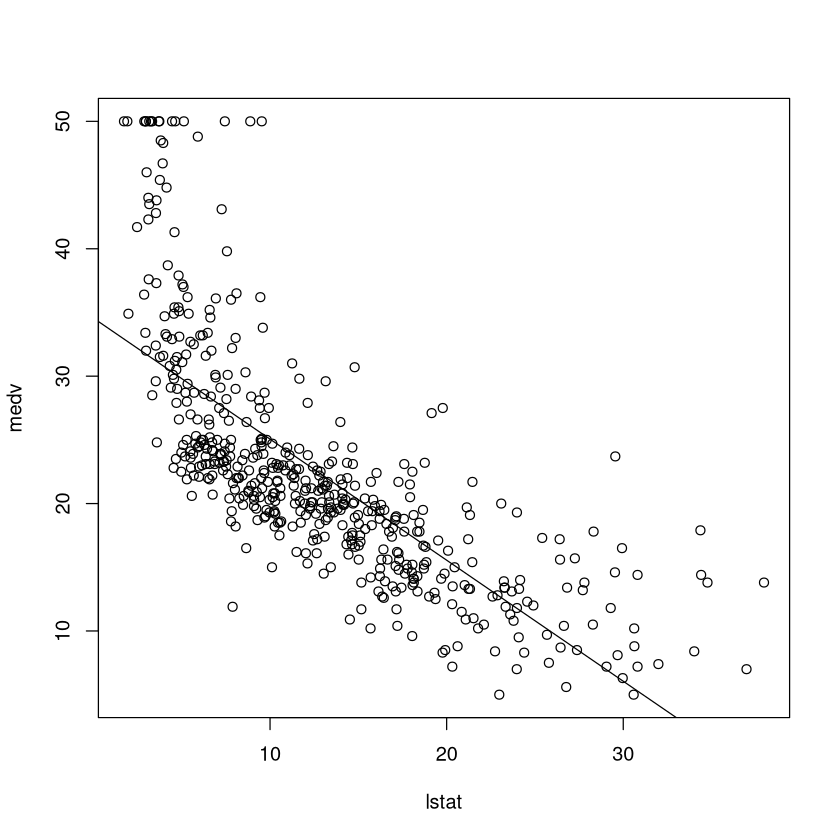

In [8]:
plot(lstat, medv)
abline(lm.fit)

There is some evidence for non-linearity in the relationship between `lstat` and `medv`. We will explore this issue later in this lab.  

The `abline()` function can be used to draw any line, not just the least squares regression line. To draw a line with intercept `a` and slope `b`, we type `abline(a,b)`. Below we experiment with some additional settings for plotting lines and points. The `lwd=3` command causes the width of the regression line to be increased by a factor of $3$; this works for the `plot()` and `lines()` functions also. We can also use the `pch` option to create different plotting symbols.

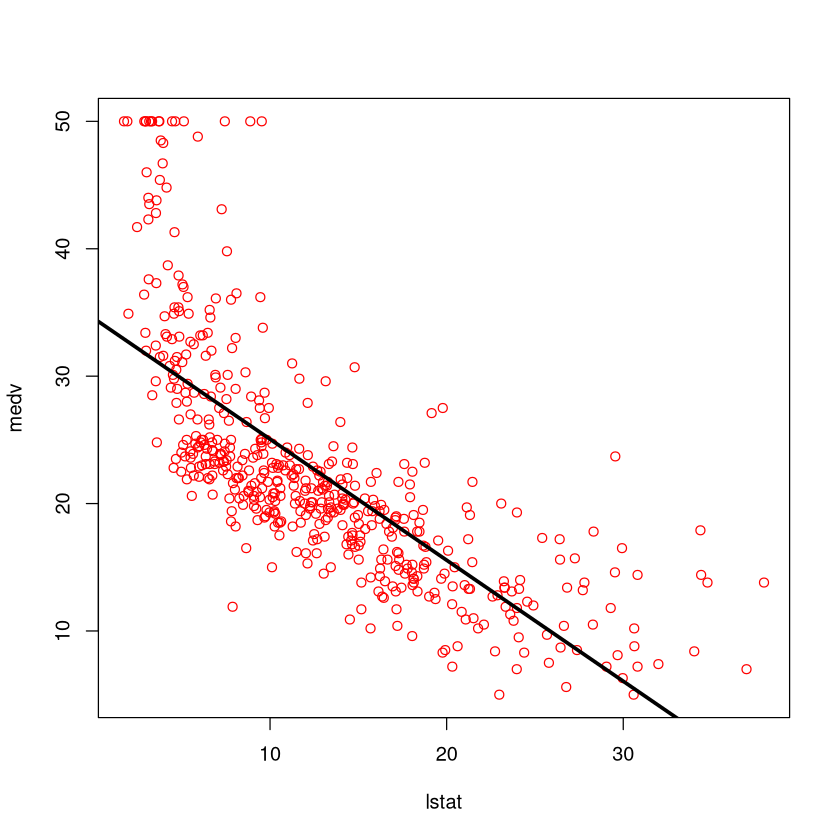

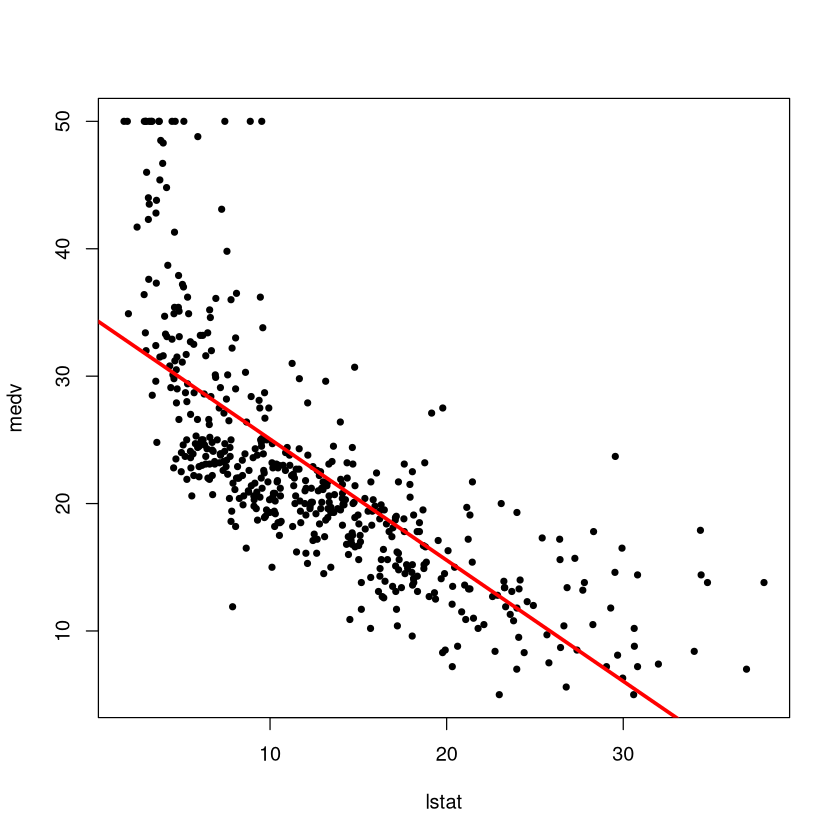

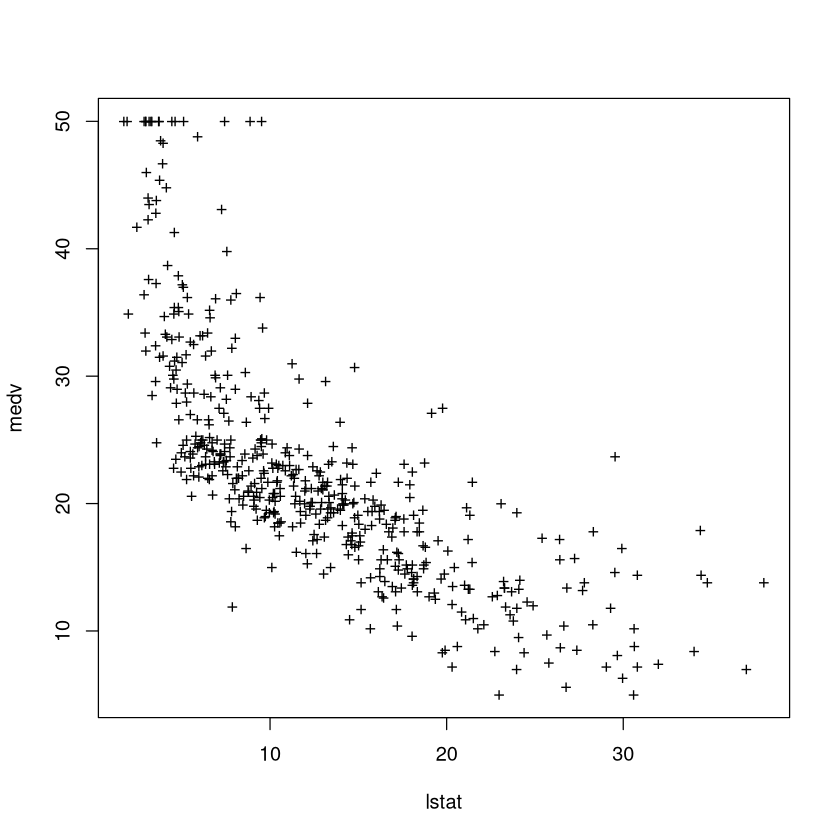

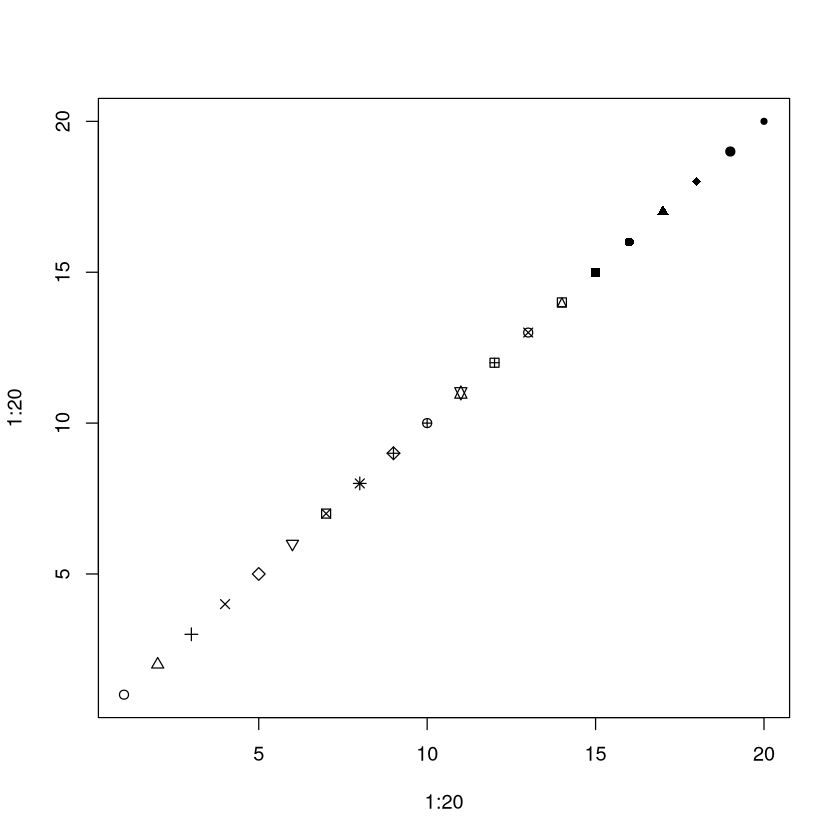

In [9]:
plot(lstat, medv, col = "red")
abline(lm.fit, lwd=3)
plot(lstat, medv, pch = 20)
abline(lm.fit, lwd=3, col = "red")
plot(lstat, medv, pch = "+")
plot(1:20, 1:20, pch = 1:20)

Next we examine some diagnostic plots, several of which were discussed in Section 3.3.3. Four diagnostic plots are automatically produced by applying the `plot()` function directly to the output from `lm()`. In general, this command will produce one plot at a time, and hitting _Enter_ will generate the next plot. However, it is often convenient to view all four plots together. We can achieve this by using the `par()` and `mfrow()` functions which tell `R` to split the display screen into separate panels so that multiple plots can be viewed simultaneously. For example, `par(mfrow = c(2, 2))` divides the plotting region into a $2\times2$ grid panels.

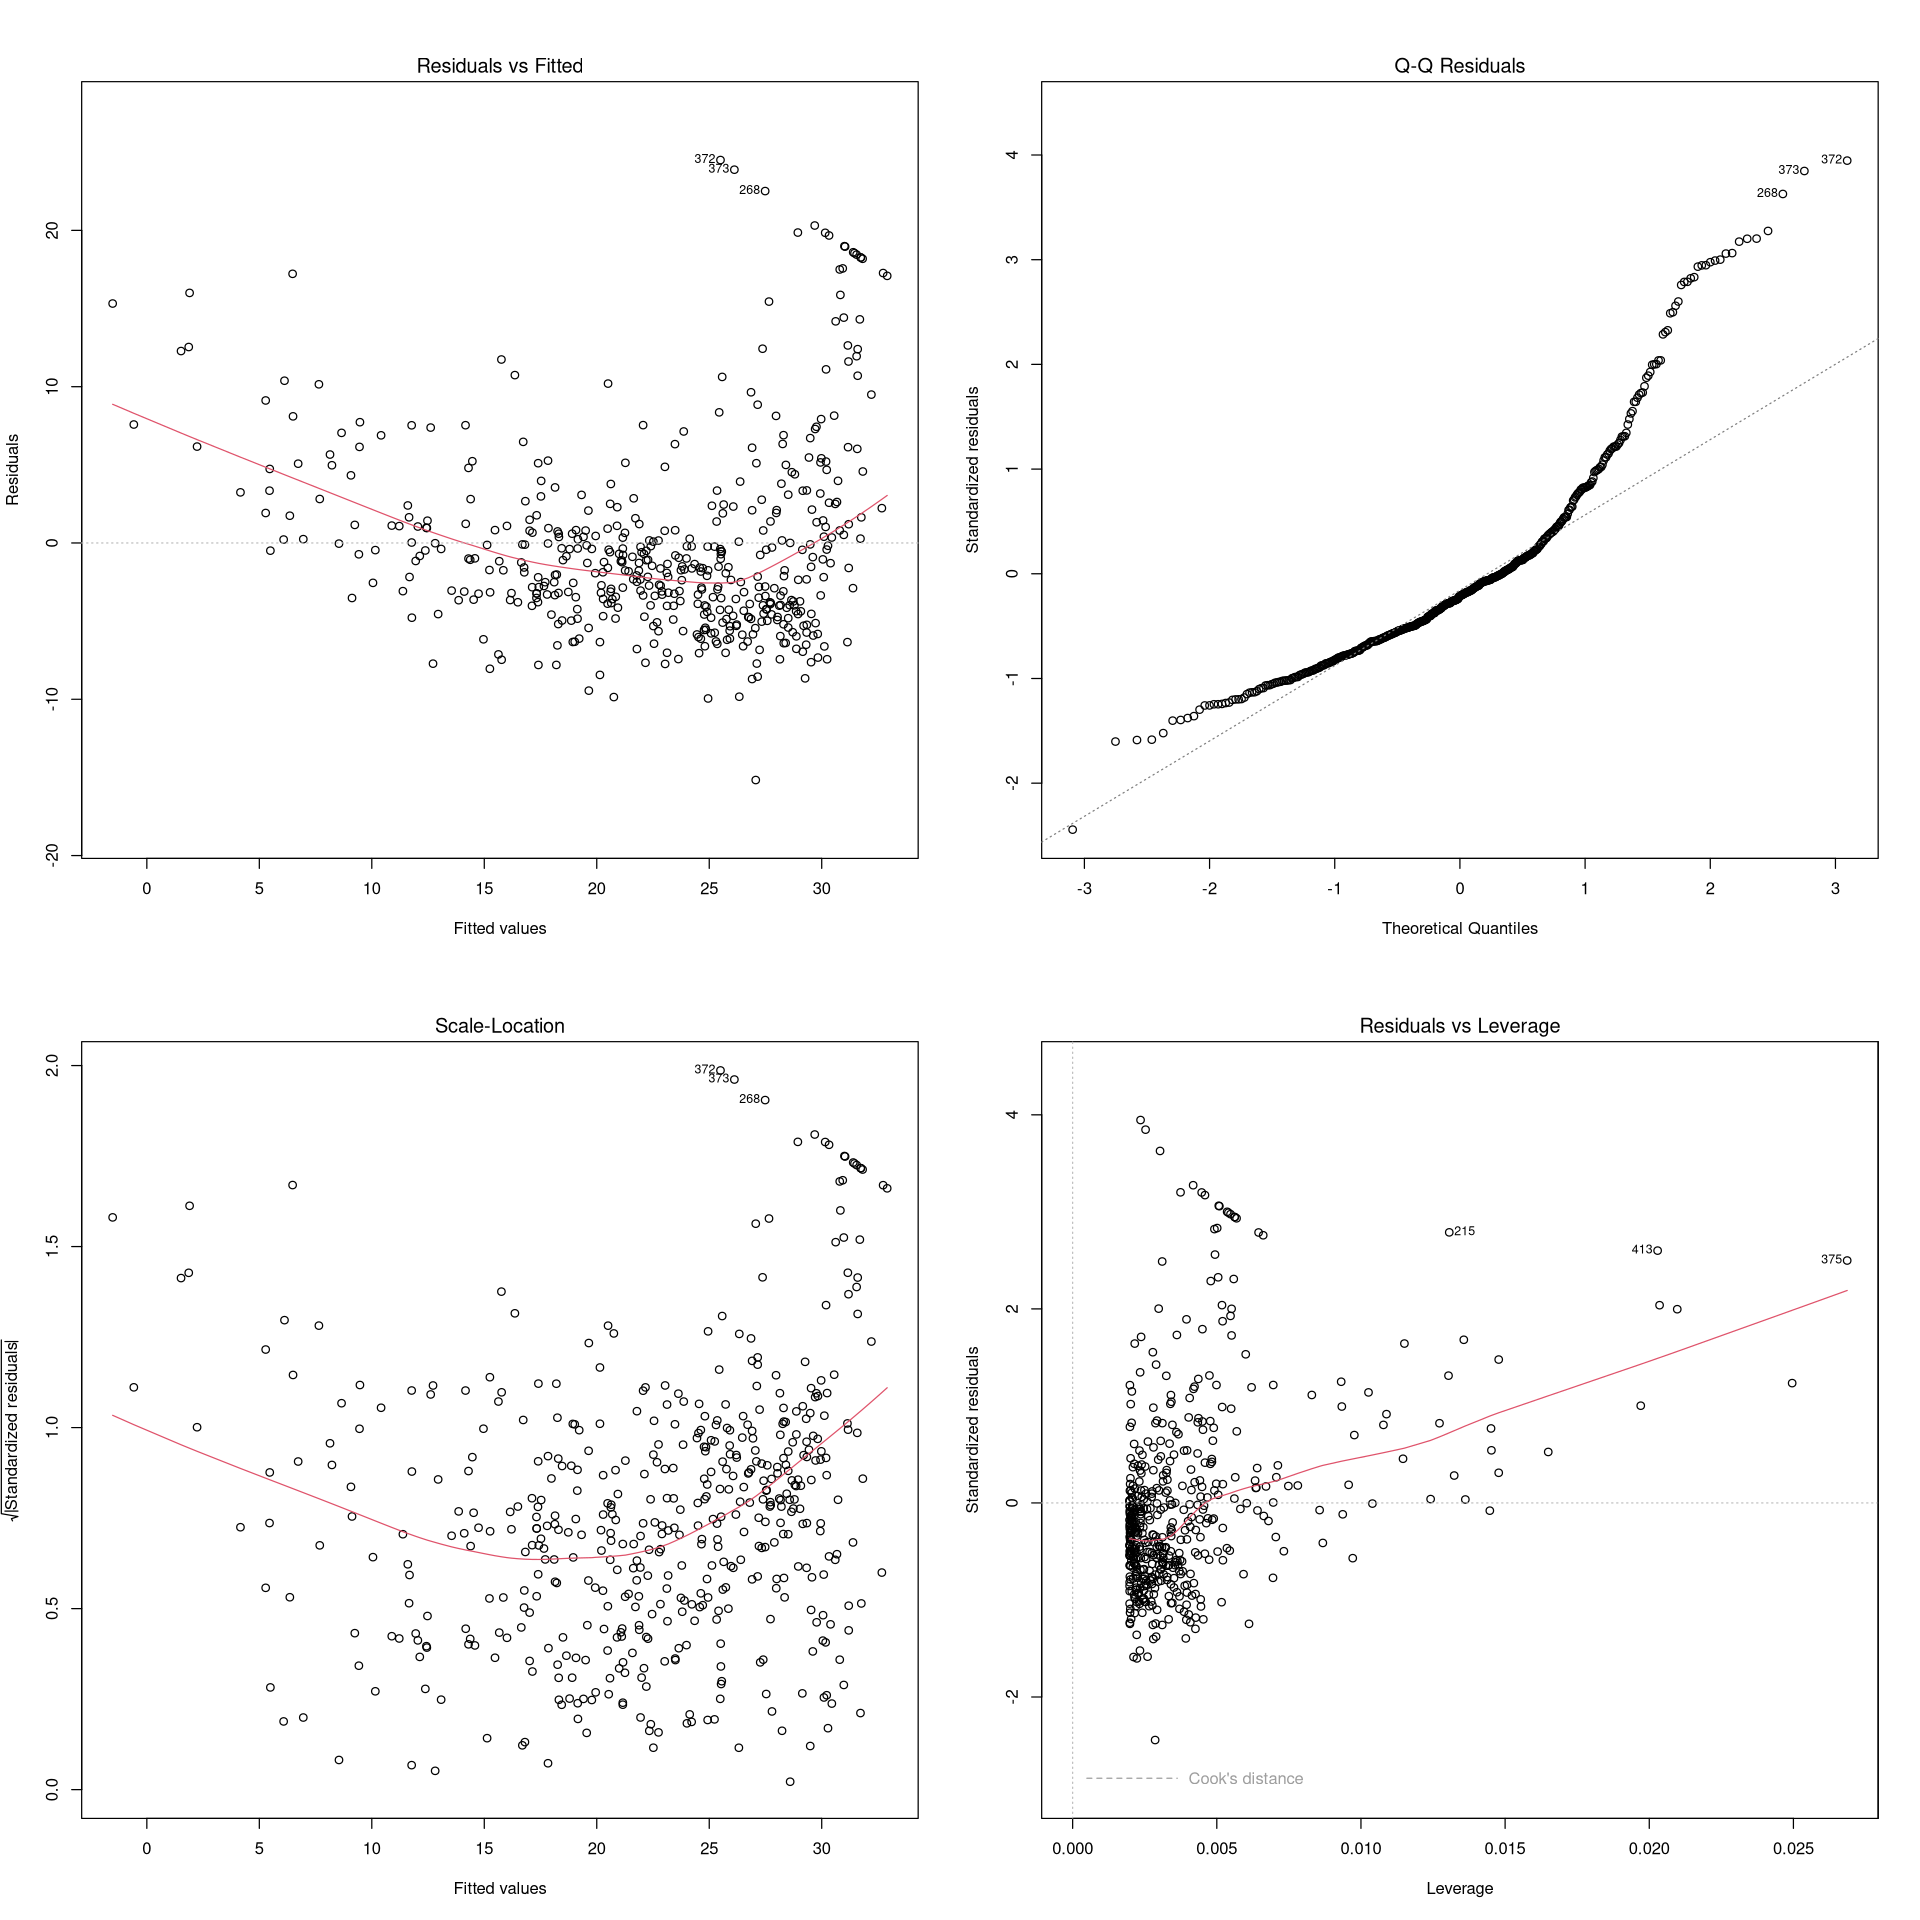

In [13]:
par(mfrow = c(2, 2))
options(repr.plot.width=16, repr.plot.height=16)
plot(lm.fit)

Alternatively, we can compute the residuals from a linear regression fit using the `residuals()` function. The function `rstudent()` will return the studentized residuals, and we can use this function to plot the residuals against the fitted values.

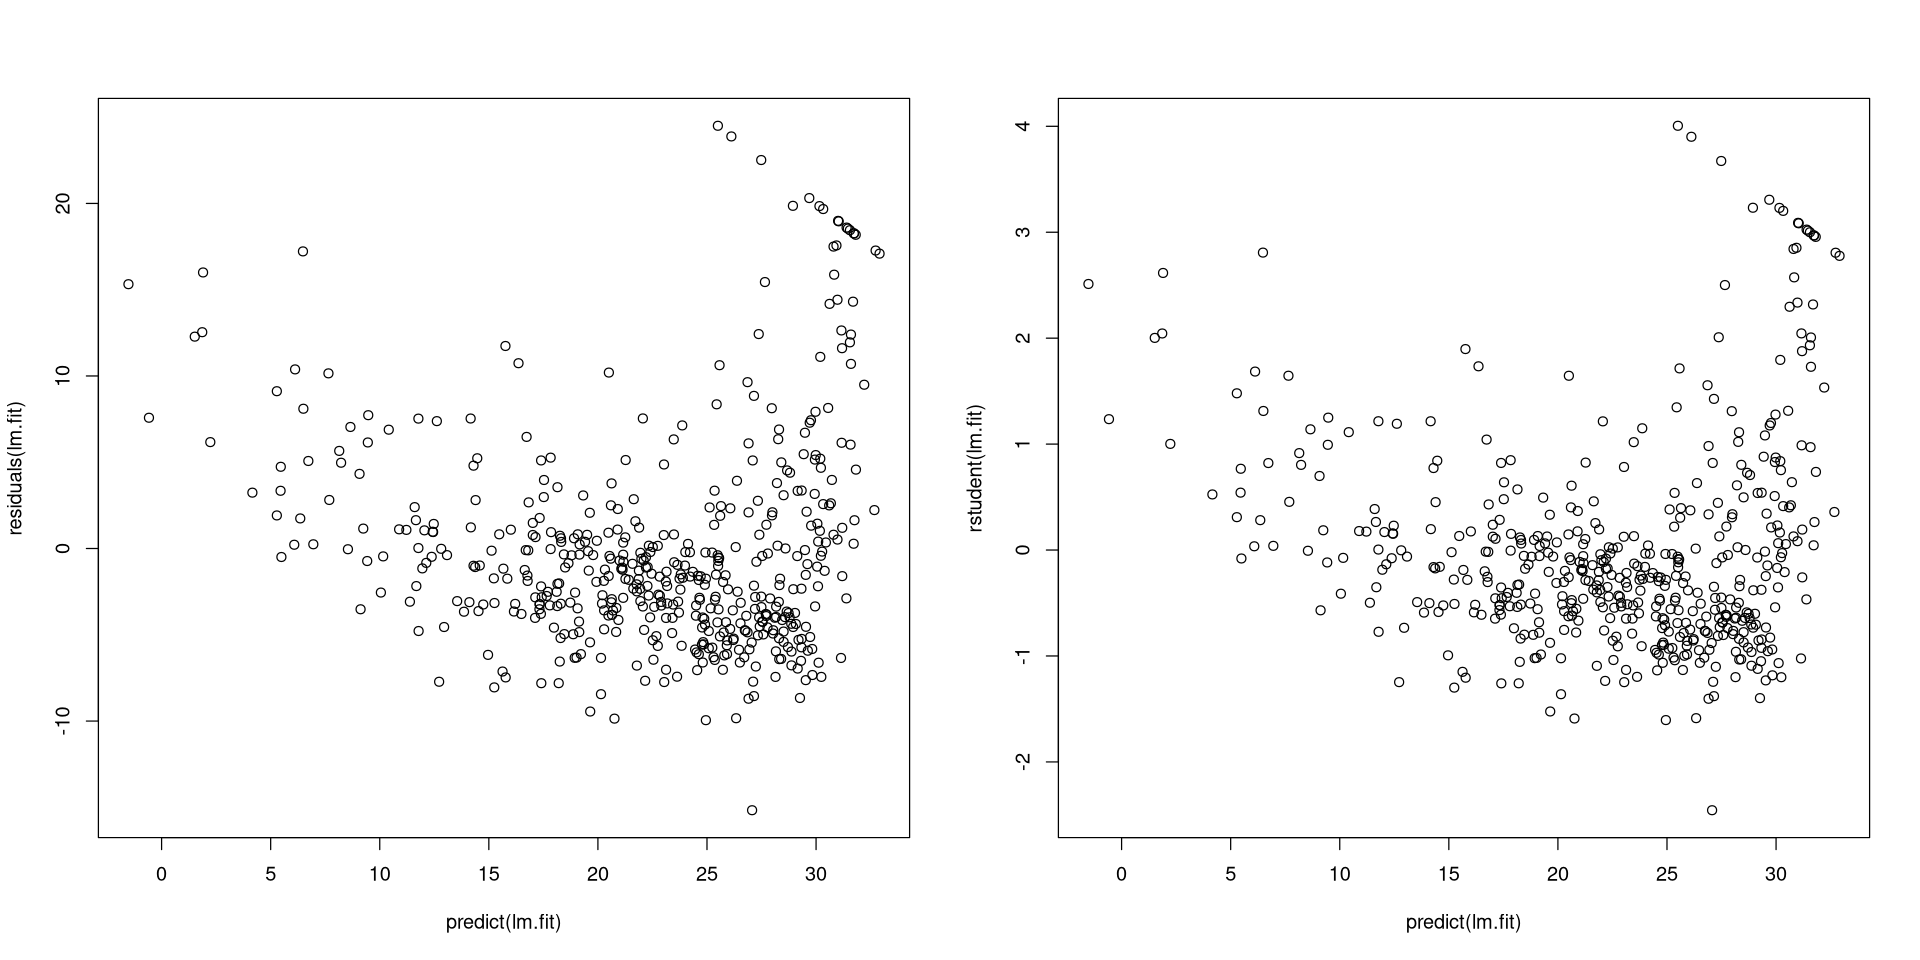

In [15]:
par(mfrow = c(1, 2))
options(repr.plot.width=16, repr.plot.height=8)
plot(predict(lm.fit), residuals(lm.fit))
plot(predict(lm.fit), rstudent(lm.fit))

On the basis of the residual plots, there is some evidence of non-linearity. Leverage statistics can be computed for any number of predictors using the `hatvalues()` function.

375 
375

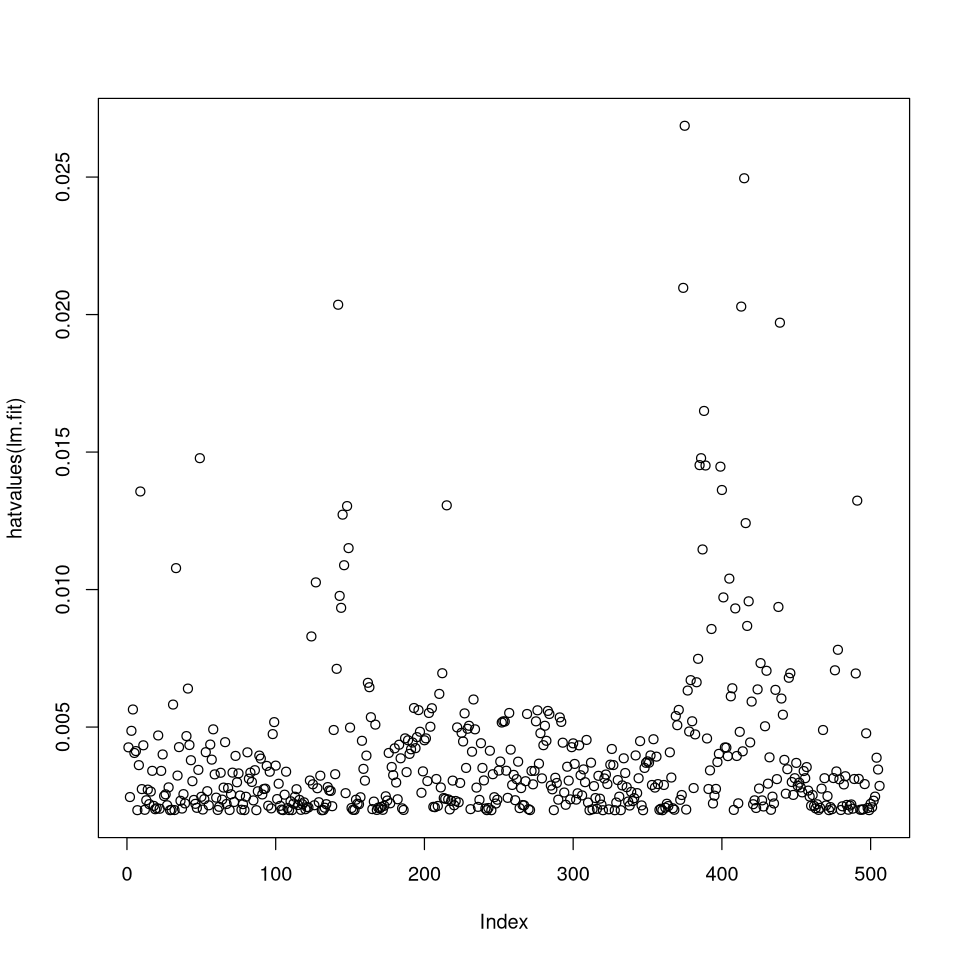

In [12]:
options(repr.plot.width=8, repr.plot.height=8)
plot(hatvalues(lm.fit))
which.max(hatvalues(lm.fit))

The `which.max()` function identifies the index of the largest element of a vector. In this case, it tells us which observation has the largest leverage statistic.